In [2]:
# Human Interpreted coordination numbers can be analyzed along with other methods
%matplotlib inline
from materialscoord.cn_methods import TestECoN, TestVoronoiCoordFinder, HumanInterpreter, TestVoronoiCoordFinder_mod
from materialscoord.core import Benchmark

methods = [HumanInterpreter(), TestECoN(), TestVoronoiCoordFinder(), TestVoronoiCoordFinder_mod()]
bm = Benchmark(methods, structure_groups=["common_binaries"], nround=2)
bm.benchmark()

Initialization successful.


In [3]:
import pandas as pd
pd.set_option('max_colwidth',200)
bm.report(totals=True)

,HumanInterpreter,TestECoN,TestVoronoiCoordFinder,TestVoronoiCoordFinder_mod
Al2O3_corundum,"[(Al, 6.0), (O, 3.0)]","[(Al, 5.79), (O, 3.92)]","[(Al, 5.29), (O, 5.29)]","[(Al, 6.0), (O, 4.0)]"
CaF2_fluorite,"[(Ca, 8.0), (F, 4.0)]","[(Ca, 8.0), (F, 7.57)]","[(Ca, 8.0), (F, 8.0)]","[(Ca, 8.0), (F, 10.0)]"
CsCl,"[(Cs, 8.0), (Cl, 8.0)]","[(Cs, 11.28), (Cl, 11.28)]","[(Cs, 10.16), (Cl, 10.16)]","[(Cs, 8.0), (Cl, 8.0)]"
Cu5Zn8_gamma_brass,"[(Zn, 12.0), (Zn, 11.0), (Cu, 12.0), (Cu, 13.0)]","[(Zn, 11.82), (Zn, 10.51), (Cu, 11.85), (Cu, 11.74)]","[(Zn, 10.52), (Zn, 9.64), (Cu, 10.88), (Cu, 9.65)]","[(Zn, 12.0), (Zn, 11.0), (Cu, 12.0), (Cu, 13.0)]"
Fe3O4_spinel,"[(Fe, 6.0), (Fe, 4.0), (O, 4.0)]","[(Fe, 6.01), (Fe, 4.0), (O, 3.67)]","[(Fe, 6.0), (Fe, 4.36), (O, 4.36)]","[(Fe, 6.0), (Fe, 4.0), (O, 4.0)]"
MgAl2O4_spinel,"[(Mg, 4.0), (Al, 6.0), (O, 4.0)]","[(Mg, 4.0), (Al, 6.0), (O, 4.1)]","[(Mg, 4.56), (Al, 6.0), (O, 4.56)]","[(Mg, 4.0), (Al, 6.0), (O, 4.0)]"
NaCl_rocksalt,"[(Na, 4.0), (Cl, 6.0)]","[(Na, 6.04), (Cl, 6.04)]","[(Na, 6.0), (Cl, 6.0)]","[(Na, 6.0), (Cl, 6.0)]"
TiO2_anatase,"[(Ti, 6.0), (O, 3.0)]","[(Ti, 5.96), (O, 3.23)]","[(Ti, 5.82), (O, 5.82)]","[(Ti, 6.0), (O, 3.0)]"
ZnS_wurtzite,"[(Zn, 4.0), (S, 4.0)]","[(Zn, 4.0), (S, 4.0)]","[(Zn, 4.28), (S, 4.28)]","[(Zn, 4.0), (S, 4.0)]"
ZnS_zincblende,"[(Zn, 4.0), (S, 4.0)]","[(Zn, 4.0), (S, 4.0)]","[(Zn, 4.54), (S, 4.54)]","[(Zn, 4.0), (S, 4.0)]"


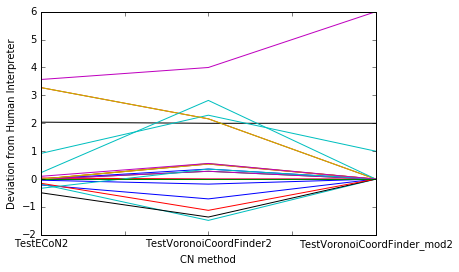

In [4]:
# Here is an example for plotting deviation of CNs for unique sites in our test structures 
# from the Human Interpreter.

p = bm.report(totals=True, separate_columns=True, max_sites=3)
ax = None
sub_p = None

for i in range(3):
    a = p[ ["TestECoN"+str(i), "TestVoronoiCoordFinder"+str(i), "TestVoronoiCoordFinder_mod"+str(i)] ]
    b = p["HumanInterpreter"+str(i)]
    c = a.sub(b, axis='rows')

    if not isinstance(sub_p, pd.DataFrame):
        sub_p = c
    else:
        sub_p = pd.concat([sub_p, c], axis=1)
    
    if ax:
        c.T.plot(legend=False, ax=ax)
    else:
        ax=c.T.plot(legend=False)
ax.set_xlabel("CN method")
ax.set_ylabel("Deviation from Human Interpreter")

In [5]:
sub_p

,TestECoN0,TestVoronoiCoordFinder0,TestVoronoiCoordFinder_mod0,TestECoN1,TestVoronoiCoordFinder1,TestVoronoiCoordFinder_mod1,TestECoN2,TestVoronoiCoordFinder2,TestVoronoiCoordFinder_mod2
Al2O3_corundum,-0.21,-0.71,0.0,0.92,2.29,1.0,0.00,0.00,0.0
CaF2_fluorite,0.00,0.00,0.0,3.57,4.00,6.0,0.00,0.00,0.0
CsCl,3.28,2.16,0.0,3.28,2.16,0.0,0.00,0.00,0.0
Cu5Zn8_gamma_brass,-0.18,-1.48,0.0,-0.49,-1.36,0.0,-0.15,-1.12,0.0
Fe3O4_spinel,0.01,0.00,0.0,0.00,0.36,0.0,-0.33,0.36,0.0
MgAl2O4_spinel,0.00,0.56,0.0,0.00,0.00,0.0,0.10,0.56,0.0
NaCl_rocksalt,2.04,2.00,2.0,0.04,0.00,0.0,0.00,0.00,0.0
TiO2_anatase,-0.04,-0.18,0.0,0.23,2.82,0.0,0.00,0.00,0.0
ZnS_wurtzite,0.00,0.28,0.0,0.00,0.28,0.0,0.00,0.00,0.0
ZnS_zincblende,0.00,0.54,0.0,0.00,0.54,0.0,0.00,0.00,0.0
